In [34]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np 
pytesseract.pytesseract.tesseract_cmd = 'S:\\Tesseract-OCR\\tesseract.exe'


In [35]:
# Menampilkan gambar
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

# Cropping gambar
def manualCrop(img, y0, yt, x0, xt):
    return img[y0:yt, x0:xt]

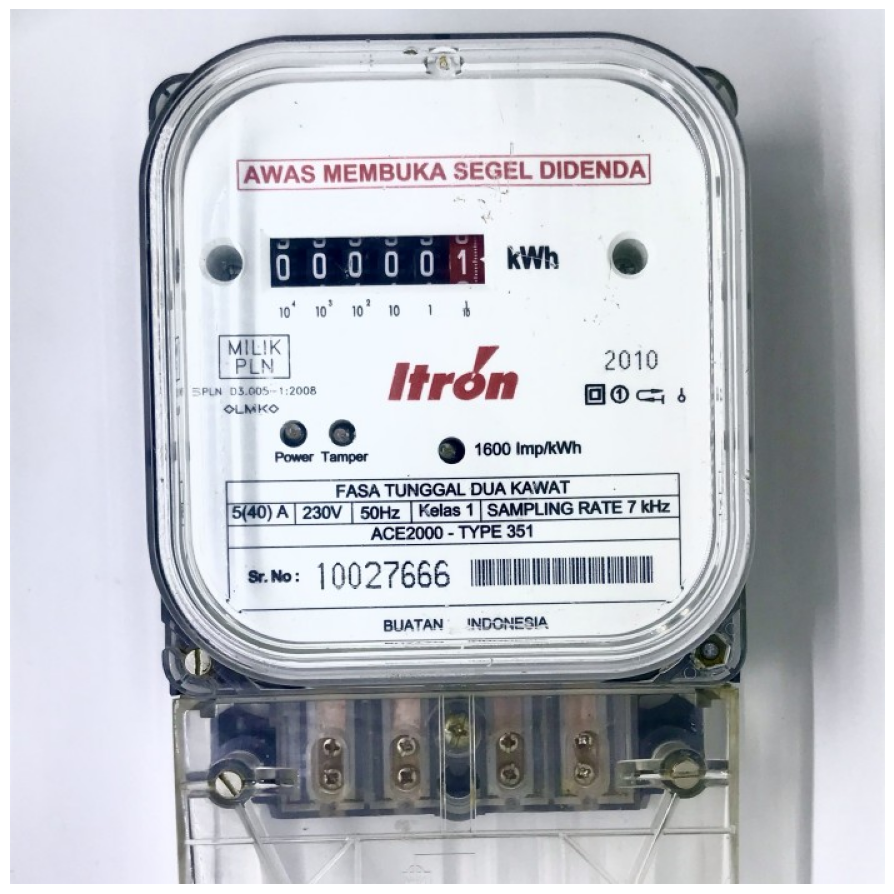

In [36]:
path_img_ori = './research/itron_meteran.jpg'
img_ori = cv2.imread(path_img_ori)
display(path_img_ori)

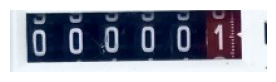

00



In [99]:
img_cropped = cv2.imwrite("research/cropped.png", manualCrop(img_ori, 180, 230,  195, 400))
img_cropped = cv2.imread("research/cropped.png")
display("research/cropped.png")
print(pytesseract.image_to_string(img_cropped, config = r'--oem 3 --psm 8 outputbase digits'))

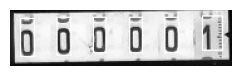

00004



In [51]:
#   Inverted Image
img_invert = cv2.bitwise_not(img_cropped)
cv2.imwrite("research/invert.jpg", img_invert)
display("research/invert.jpg")
print(pytesseract.image_to_string(img_invert, config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789'))

In [49]:
# Grayscale
img_grayscale = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)
cv2.imwrite("research/grayscale.jpg", img_grayscale)
display("research/grayscale.jpg")
print(pytesseract.image_to_string(img_grayscale, config = r'--oem 3 --psm 8 outputbase digits'))

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


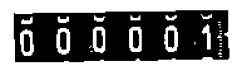

00004



In [52]:
# tunning Threshold
thresh, img_thr = cv2.threshold(img_grayscale, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite("research/thr120-255.jpg", img_thr)
display("research/thr120-255.jpg")
print(pytesseract.image_to_string(img_thr, config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789'))

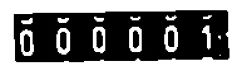

00001



In [42]:
# Remove noise
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

img_noiseRemoval = noise_removal(img_thr)
cv2.imwrite("research/noise_removal.jpg", img_noiseRemoval)
display("research/noise_removal.jpg")
print(pytesseract.image_to_string(img_noiseRemoval, config = r'--oem 3 --psm 8  -c tessedit_char_whitelist=0123456789'))


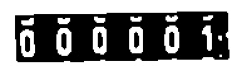

00001



In [44]:
# Menipiskn font
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

img_eroded = thick_font(img_noiseRemoval)
cv2.imwrite("research/erodedThinfont.jpg", img_eroded)
display("research/erodedThinfont.jpg")
print(pytesseract.image_to_string(img_eroded, config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'))


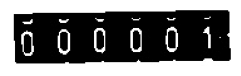

0 9 8 76 38 0
0 96 11 134 38 0
1 154 14 160 39 0



In [46]:
# Menipiskan font
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

img_dilated = thin_font(img_noiseRemoval)
cv2.imwrite("research/dilatedThickfont.jpg", img_dilated)
display("research/dilatedThickfont.jpg")
print(pytesseract.image_to_boxes(img_dilated, config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=0123456789'))


In [102]:
img_cropped = cv2.imread('research\cropped.png', 0)


def bounding_boxes(img):
    height, width,  = img.shape[:2]
    box = pytesseract.image_to_boxes(img, config = r'--oem 3 --psm 1 -c tessedit_char_whitelist=0123456789', lang='eng')
    for i in box.splitlines():
        i = i.split(' ')
        xmin, ymin, xmax, ymax = int(i[1]), int(i[2]), int(i[3]), int(i[4])
        cv2.rectangle(img, (xmin, height-ymin), (xmax, height-ymax), (0, 0, 255))
        cv2.imwrite(f'research/boundingboxes_.png', img)
        print(f"Nilai : {i[0]}")

bounding_boxes(img_noiseRemoval)


Nilai : 0
Nilai : 0
Nilai : 0
Nilai : 0
Nilai : 0
Nilai : 1
